In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk as nltk
import gensim as gs

In [0]:
import urllib.request
import requests

In [9]:
query = input("Enter search term:")
query=query.replace(" ","+")

Enter search term:alia bhatt


In [0]:
link = "http://www.google.com/search?q="+query

In [11]:
link

'http://www.google.com/search?q=alia+bhatt'

In [0]:
html =requests.get(link)
from bs4 import BeautifulSoup
soup = BeautifulSoup(html.text,"lxml")

In [0]:
import re
links = []
for link in soup.find_all("a"):
  links.append(link.get('href'))

In [0]:
new=[]
for i in links:
  if i.startswith('/url'):
    new.append(i)

In [25]:
str_html="https://google.com"
listnew=[]
for i in new:
    listnew.append(str_html+i)
print(listnew[0])

https://google.com/url?q=http://google.com/search%3Ftbm%3Disch%26q%3DAlia%2BBhatt&sa=U&ved=2ahUKEwjDprfu8eHlAhXfHzQIHV5vBvkQwW4wAHoECAsQAg&usg=AOvVaw2HPYMcI5fCwrzYvCnIDw5E


In [0]:
text=[]
for i in range(len(listnew)):
  req = urllib.request.Request(listnew[i],headers = {'User-Agent' : 'Magic Browser'})
  response = urllib.request.urlopen(req)
  html = response.read()
  soup = BeautifulSoup(html,"lxml")
  for j in range(len(soup.find_all("p"))):
    text.append(soup.find_all("p")[j].get_text())


In [28]:
len(text)

566

In [30]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation
stuff_to_be_removed = list(stopwords.words("english"))+list(punctuation)
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [34]:
nltk.download('punkt')
nltk.download('wordnet')
def my_tokenizer(s):
    s = s.lower()
    text = nltk.tokenize.word_tokenize(s)
    text = [t for t in text if len(t) > 2]
    text = [lemmatizer.lemmatize(y) for y in text if y not in stuff_to_be_removed]
    text = [t for t in text if not any(c.isdigit() for c in t)]
    
    return text

final_text = [my_tokenizer(s) for s in text]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
import gensim
from gensim.corpora import dictionary
from gensim import corpora
from pprint import pprint

id2word = corpora.Dictionary(final_text)
mycorpus = [id2word.doc2bow(s) for s in final_text]
lda_model = gensim.models.ldamodel.LdaModel(corpus=mycorpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=42,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [36]:
pprint(lda_model.print_topics())

[(0,
  '0.038*"..." + 0.025*"loading" + 0.019*"love" + 0.016*"comment" + '
  '0.016*"conversation" + 0.013*"let" + 0.012*"latest" + 0.011*"see" + '
  '0.010*"know" + 0.010*"heart"'),
 (1,
  '0.020*"look" + 0.020*"movie" + 0.013*"alia" + 0.013*"photo" + 0.012*"time" '
  '+ 0.011*"made" + 0.010*"first" + 0.008*"actress" + 0.008*"pinkvilla" + '
  '0.007*"imdb"'),
 (2,
  '0.051*"alia" + 0.034*"bhatt" + 0.019*"like" + 0.016*"fan" + 0.013*"picture" '
  '+ 0.012*"outfit" + 0.010*"added" + 0.009*"post" + 0.009*"retweeted" + '
  '0.009*"http"'),
 (3,
  '0.018*"bhatt" + 0.016*"film" + 0.010*"kapoor" + 0.009*"also" + 0.009*"many" '
  '+ 0.008*"chaotic" + 0.008*"beautifully" + 0.007*"list" + 0.006*"award" + '
  '0.006*"krishnamurti"'),
 (4,
  '0.019*"film" + 0.017*"bhatt" + 0.012*"ranbir" + 0.011*"star" + '
  '0.011*"video" + 0.011*"get" + 0.010*"sanjay" + 0.010*"sadak" + '
  '0.009*"account" + 0.009*"dutt"'),
 (5,
  '0.044*"bhatt" + 0.038*"film" + 0.021*"actress" + 0.016*"award" + '
  '0.015*"bes

In [0]:
doc_lda = lda_model[mycorpus]

In [38]:

print('\nPerplexity: ', lda_model.log_perplexity(mycorpus)) 
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=final_text, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.281816891599463

Coherence Score:  0.5126256173720334


In [40]:
!pip install pyLDAvis
import os
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, mycorpus, id2word)
vis

     |████████████████████████████████| 1.6MB 4.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=c55ad0fc87fa412926acd8b1df7de026017de7a5982b3103050b74c8c72a41cb
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.164167  0.044043       1        1  23.156345
3     -0.099278 -0.021541       2        1  18.456415
6     -0.129222 -0.033240       3        1  16.971397
1      0.171440  0.145695       4        1  12.702669
4     -0.014317  0.039820       5        1   8.847288
7     -0.001639 -0.055300       6        1   7.679935
2      0.085345  0.083635       7        1   7.226480
0      0.151837 -0.203112       8        1   4.959466, topic_info=     Category        Freq   Term       Total  loglift  logprob
30    Default   79.000000   alia   79.000000  30.0000  30.0000
32    Default  221.000000  bhatt  221.000000  29.0000  29.0000
317   Default  164.000000   film  164.000000  28.0000  28.0000
1951  Default   18.000000    ...   18.000000  27.0000  27.0000
1120  Default   24.000000  movie   24.000000  26.0000  26.0000
...       ...         ...    ...         ...      ...      ...
44     Topic8    6.027320    let   10.076163   2.4900  -4.3346
206    Topic8    4.369593  heart    6.928693   2.5429  -4.6562
196    Topic8    8.616168   love   19.175903   2.2039  -3.9772
280    Topic8    5.218536    see    9.679731   2.3861  -4.4787
1175   Topic8    2.472820   look   26.951872   0.6152  -5.2255

[400 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1031      5  0.810828   'bala
1023      5  0.761207  'panga
5         7  0.891774     've
1951      8  0.971229     ...
1584      3  0.869261   aamir
...     ...       ...     ...
119       1  0.379574    year
119       2  0.295224    year
119       3  0.168700    year
119       4  0.084350    year
119       8  0.042175    year

[509 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 7, 2, 5, 8, 3, 1])

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

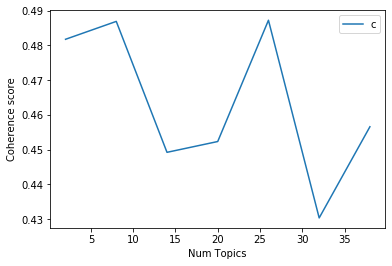

In [41]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=mycorpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=mycorpus, texts=final_text, start=2, limit=40, step=6)
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [42]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.4818
Num Topics = 8  has Coherence Value of 0.4869
Num Topics = 14  has Coherence Value of 0.4492
Num Topics = 20  has Coherence Value of 0.4523
Num Topics = 26  has Coherence Value of 0.4873
Num Topics = 32  has Coherence Value of 0.4303
Num Topics = 38  has Coherence Value of 0.4566


In [43]:
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.025*"bhatt" + 0.020*"film" + 0.009*"drama" + 0.008*"actress" + '
  '0.007*"love" + 0.007*"hindi" + 0.006*"kapoor" + 0.006*"tweet" + '
  '0.006*"alia" + 0.006*"dulhania"'),
 (1,
  '0.012*"stage" + 0.011*"malhotra" + 0.011*"dhawan" + 0.011*"performed" + '
  '0.010*"bhatt" + 0.009*"film" + 0.009*"career" + 0.009*"best" + '
  '0.009*"story" + 0.008*"roy"'),
 (2,
  '0.058*"bhatt" + 0.038*"film" + 0.014*"actress" + 0.009*"director" + '
  '0.009*"alia" + 0.007*"award" + 0.006*"indian" + 0.006*"best" + '
  '0.006*"india" + 0.006*"pooja"'),
 (3,
  '0.011*"fear" + 0.008*"watch" + 0.008*"get" + 0.008*"chaotic" + '
  '0.008*"beautifully" + 0.008*"heatpeak" + 0.008*"dhawan" + 0.007*"makeup" + '
  '0.007*"varun" + 0.007*"hair"'),
 (4,
  '0.015*"bhatt" + 0.014*"film" + 0.010*"actress" + 0.009*"look" + '
  '0.008*"award" + 0.008*"indian" + 0.007*"first" + 0.007*"next" + '
  '0.007*"alia" + 0.006*"also"'),
 (5,
  '0.026*"alia" + 0.021*"bhatt" + 0.014*"tweet" + 0.012*"location" + '
  '0.010*"a

In [44]:
import pandas as pd
def format_topics_sentences(ldamodel=lda_model, corpus=mycorpus, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=mycorpus, texts=final_text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10.0,0.8452,"alia, bhatt, made, actress, back, look, year, ...","[advanced, searchsearch, help, send, feedback]"
1,1,8.0,0.9156,"celebrity, alia, bhatt, post, use, contact, ad...","['ve, detected, javascript, disabled, browser,..."
2,2,3.0,0.5357,"fear, watch, get, chaotic, beautifully, heatpe...",[yes]
3,3,3.0,0.6905,"fear, watch, get, chaotic, beautifully, heatpe...","[beautifully, chaotic]"
4,4,11.0,0.8968,"bhatt, alia, film, also, kapoor, added, role, ...","[sure, want, view, tweet, viewing, tweet, n't,..."
5,5,1.0,0.8452,"stage, malhotra, dhawan, performed, bhatt, fil...","[favourite, co-star, big, small, flipkart]"
6,6,11.0,0.5245,"bhatt, alia, film, also, kapoor, added, role, ...","[alia, bhatt, retweeted, arjun, kapoor]"
7,7,2.0,0.6905,"bhatt, film, actress, director, alia, award, i...","[epic, http]"
8,8,11.0,0.7679,"bhatt, alia, film, also, kapoor, added, role, ...","[alia, bhatt, added]"
9,9,4.0,0.9558,"bhatt, film, actress, look, award, indian, fir...","[let, make, diwali, special, pooch, include, f..."


In [46]:
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)



,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9927,"bhatt, film, drama, actress, love, hindi, kapoor, tweet, alia, dulhania","[first, three, release, bhatt, played, supporting, part, lively, young, girl, buried, past, kapo..."
1,1.0,0.9840,"stage, malhotra, dhawan, performed, bhatt, film, career, best, story, roy","[bhatt, performed, stage, filmfare, screen, stardust, award, ceremony, also, participated, stage..."
2,2.0,0.9930,"bhatt, film, actress, director, alia, award, indian, best, india, pooja","[series, successful, film, continued, bhatt, next, project—the, romantic, comedy, badrinath, dul..."
3,3.0,0.9511,"fear, watch, get, chaotic, beautifully, heatpeak, dhawan, makeup, varun, hair","[must, mermaid, fear, depth, great, fear, shallow, living, anais, nin, vogueindia, photographed,..."
4,4.0,0.9742,"bhatt, film, actress, look, award, indian, first, next, alia, also","[all-grey, outfit, actress, picked, oversized, turtleneck, sweater, looked, incredibly, comforta..."
5,5.0,0.9898,"alia, bhatt, tweet, location, actress, also, film, loading, ..., kapoor","[director, producer, mahesh, bhatt, legacy, mentoring, many, actor, actress, launching, career, ..."
6,6.0,0.9887,"film, bhatt, director, music, first, song, kapoor, success, soundtrack, role","[bhatt, first, leading, role, karan, johar, student, year, alongside, sidharth, malhotra, varun,..."
7,7.0,0.9454,"twitter, developer, website, video, agreeing, content, app, embedding, policy, agreement","[guy, new, video, youtube, channel, question, surprise, giveaway, end, watch, latest, video, cha..."
8,8.0,0.9668,"celebrity, alia, bhatt, post, use, contact, advertise, copyright, pinkvilla, care","[refrain, posting, comment, obscene, defamatory, inflammatory, indulge, personal, attack, name, ..."
9,9.0,0.9668,"bhatt, also, alia, brand, fashion, release, time, name, film, celebrity","[malaika, kept, simple, shirt, dress, zara, without, looking, sloppy, love, effortlessly, styled..."


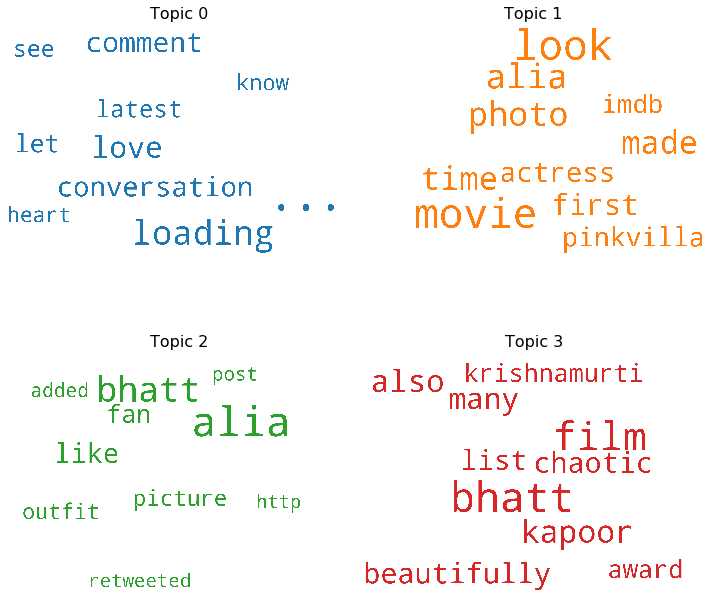

In [47]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stuff_to_be_removed,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

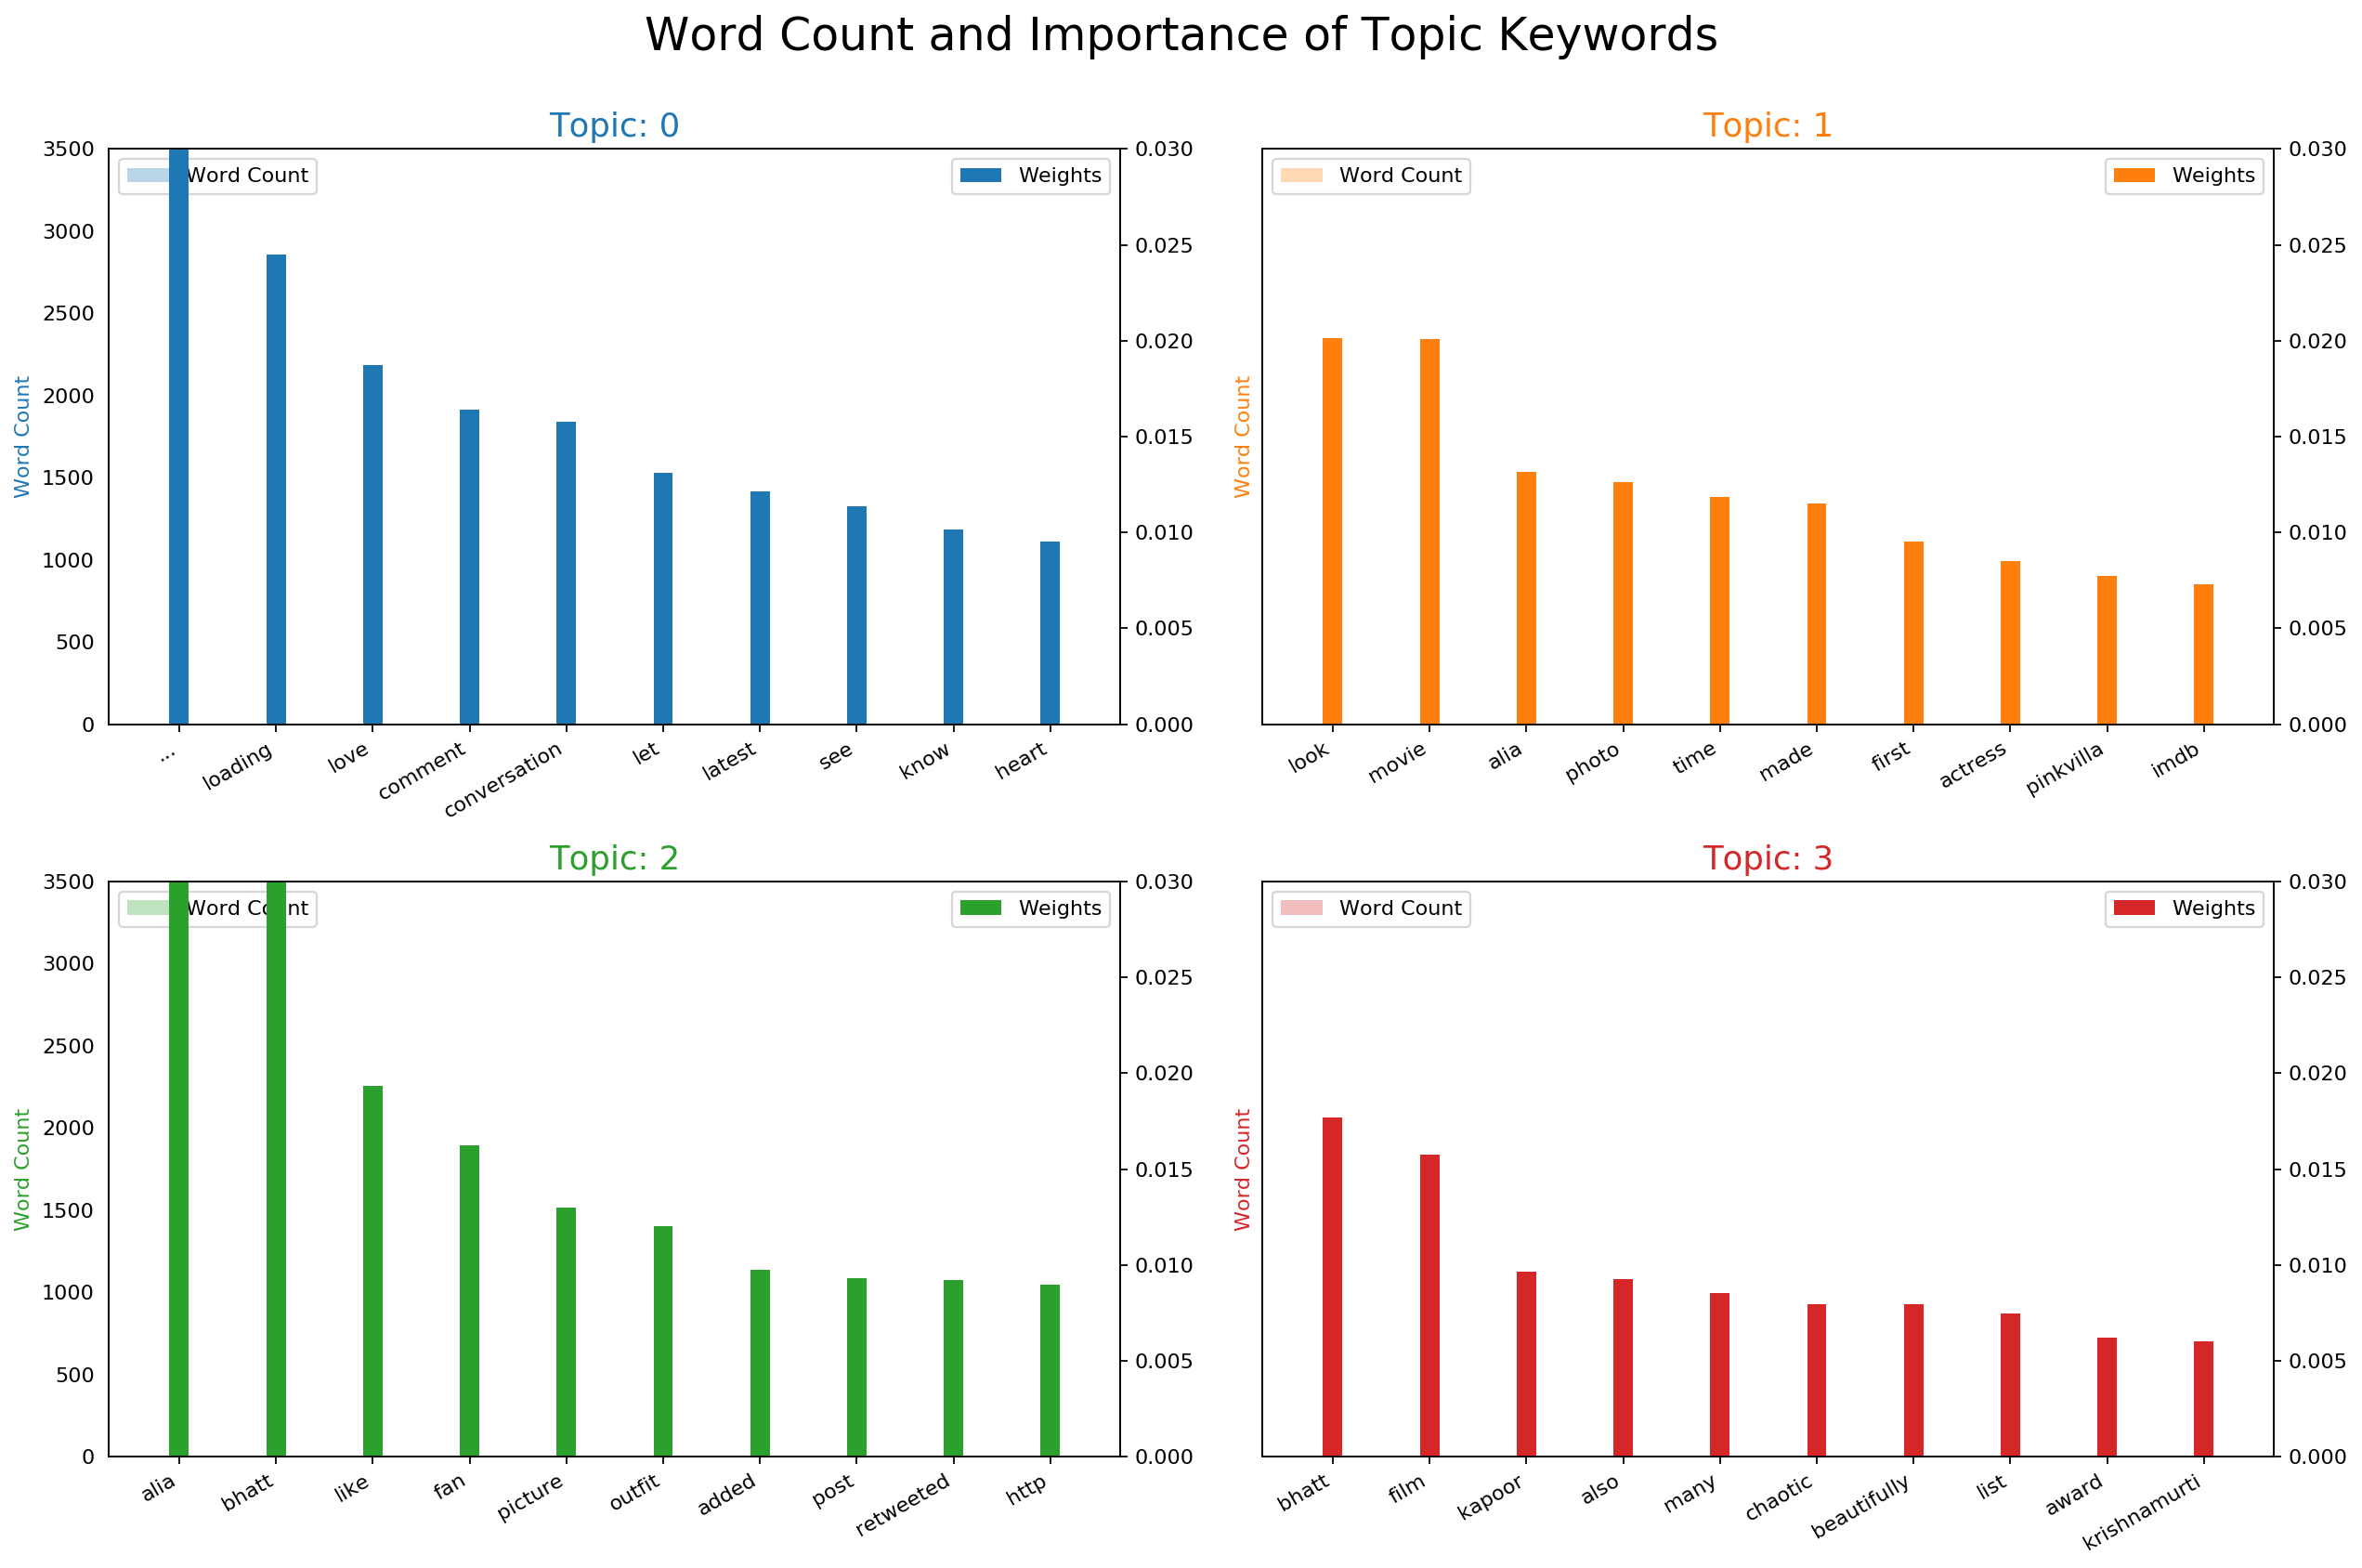

In [48]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in text for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()